In [64]:
import numpy as np
import pandas as pd

In [65]:
# rastrigin function
def rastrigin(x):
    return 10 * len(x) + sum([(xi ** 2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])

In [66]:
# wielkość populacji
PS = 10

# liczba iteracji
NOG = 5

# liczba wymiarów
DV = 1

In [67]:
LB = -5.12
UB = 5.12
X = np.random.uniform(LB, UB, (PS, DV))

In [68]:
r1 = np.random.randint(0, PS)
print(f"r1 = {r1}")

r1 = 7


![SNOWFALL](img1.png) 
![SNOWFALL](img2.png) 

In [69]:
R1 = np.random.random()
r2 = round(R1 * (PS-1))
print(f"R1 = {R1}")
print(f"r2 = {r2}")

R1 = 0.8605163656294545
r2 = 8


In [70]:
r3 = r2
while r2 == r3 or r1 == r3:
    R2 = np.random.random()
    r3 = round(R2 * (PS - 1))
print(f"R2 = {R2}")
print(f"r3 = {r3}")

R2 = 0.45141119533596574
r3 = 4


In [71]:
X1 = X[r1]
X2 = X[r2]
X3 = X[r3]
df = pd.concat([pd.DataFrame(X1), pd.DataFrame(X2), pd.DataFrame(X3)], axis=1)
df.columns = ["X1", "X2", "X3"]
print(df)

         X1        X2       X3
0 -1.435236 -1.933112  3.18791


In [72]:
r = np.array([r1, r2, r3])
print(f"r = {r}")

r = [7 8 4]


In [73]:
D = 1/PS * r
print(f"D = {D}")

D = [0.7 0.8 0.4]


In [74]:
V = np.random.random()*(1-D)
print(f"V = {V}")

V = [0.19004006 0.12669338 0.38008013]


In [75]:
D1, D2, D3 = D
V1, V2, V3 = V

x = np.absolute(D3 - D1)
y = np.absolute(D3 - D2)
x1 = (V3 * x) / (V1 - V3)
y1 = V2 * x * (V1 - V3)

In [76]:
new_X1 = 0
V_co = V1 / (V1 - V3)

if V3 < V1:
    if (y-y1) > x1:
        new_X1 = X1 + np.random.random() * V_co *  (X1 - X3)
        pass
    else:
        new_X1 = X1 + np.random.random() *  (X1 - X2)
        pass
else:
    new_X1 = X1 + np.random.random() *  (X3 - X1)
    pass



In [77]:


if rastrigin(new_X1) < rastrigin(X1): 
    X1 = new_X1
    
for k in range(PS - 1): 
    X[k] = X[k+1]
    i = np.random.randint(0, DV)
    X[k+1][i] = LB + np.random.random() * (UB - LB)
    
print(X)

[[-3.09787952]
 [ 0.8575633 ]
 [-3.56948016]
 [ 3.18790956]
 [ 0.81461502]
 [-3.43840926]
 [-1.43523629]
 [-1.93311245]
 [-4.22336194]
 [ 2.35212013]]


In [80]:

%load_ext autoreload
%autoreload 2

from PVS import PVS
import matplotlib.pyplot as plt

from funcs import *


pvc = PVS()

def get_stats(solutions): 
    print(np.mean(solutions), np.std(solutions))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# rastrigin function
100 - samples 
20 - generations

[(array([-0.06237264, -0.97513715]), 1.8347003030957438), (array([1.0103145 , 0.01030964]), 1.0628078340761604), (array([-1.00704352,  0.02781978]), 1.1770829254083033), (array([0.03262463, 1.08119842]), 2.6528741265975313), (array([1.00172398, 0.91159367]), 3.3385313135890726), (array([-1.03608427,  0.02134206]), 1.4196204591089128), (array([1.04824165, 0.95010301]), 2.9448188059750997), (array([-0.01877773, -1.03505423]), 1.3827864799186784), (array([0.96642971, 0.09598295]), 2.9288958968946197), (array([ 0.05083413, -0.02475444]), 0.6296725129877316), (array([ 0.06711095, -0.9848906 ]), 1.8954782045280716), (array([ 0.01842435, -0.08522211]), 1.4742255706910115), (array([ 0.99209847, -0.05436874]), 1.5773676720809284), (array([-1.1276235 ,  1.02742226]), 5.521645885165279), (array([-0.98424176,  0.04095636]), 1.3486728974671145), (array([-0.0663633 , -1.03156165]), 2.121318830092168), (array([-1.0075823 ,  0.05913675]), 1.7124705644024267), (array([0.08152884, 0.06246582]), 2.054545

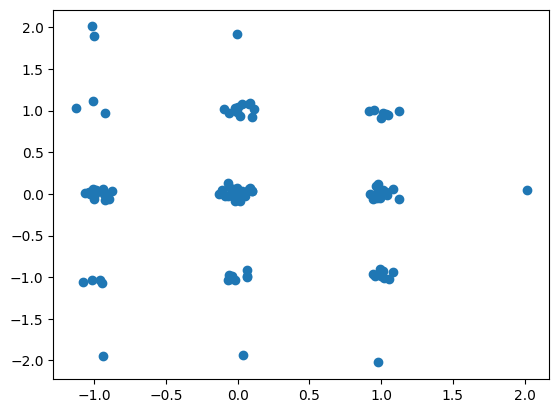

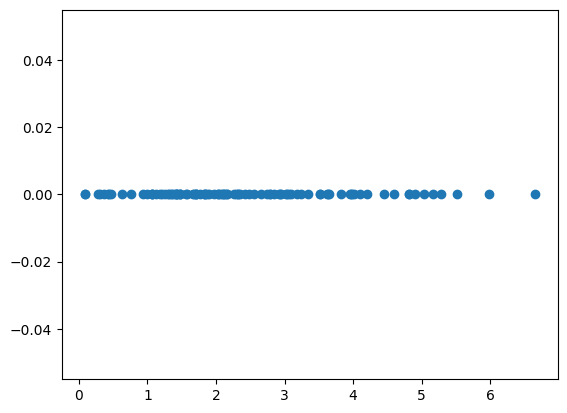

In [113]:

sol = [pvc.solve(rastrigin, 10, 20, 2, -5.12, 5.12) for i in range(100)]

print(sol)
# solutions
plt.scatter([x[0][0] for x in sol], [x[0][1] for x in sol])
plt.show()

# solutions values
plt.scatter([x[1] for x in sol], np.zeros(len(sol)))


[(array([0.74614895, 0.55530196]), 0.06464665117280313), (array([0.58834204, 0.47227033]), 1.7601880413944184), (array([1.13464712, 1.36361236]), 0.5985951863254207), (array([0.94314846, 0.94650183]), 0.3278222028254407), (array([-0.3766153 ,  0.16646047]), 1.9556909655904544), (array([2.52633629, 6.33275374]), 2.575930129341251), (array([0.70616795, 0.47544224]), 0.14030491384371233), (array([0.75131407, 0.52356556]), 0.2291851251171092), (array([0.55258142, 0.35090323]), 0.40772741060548146), (array([1.37343506, 1.89003403]), 0.14083027643842372), (array([-0.18051457,  0.05800298]), 1.45821944837139), (array([0.71214668, 0.4969583 ]), 0.09325250161415564), (array([0.75334126, 0.54391644]), 0.11656776228158465), (array([1.87296428, 3.63257209]), 2.31400710905039), (array([1.91321776, 3.68637131]), 0.9014060752287959), (array([0.81557545, 0.66497528]), 0.034015950904732174), (array([0.34401031, 0.11639588]), 0.4307016403828221), (array([0.5510596 , 0.35043885]), 0.4203110049463817), (a

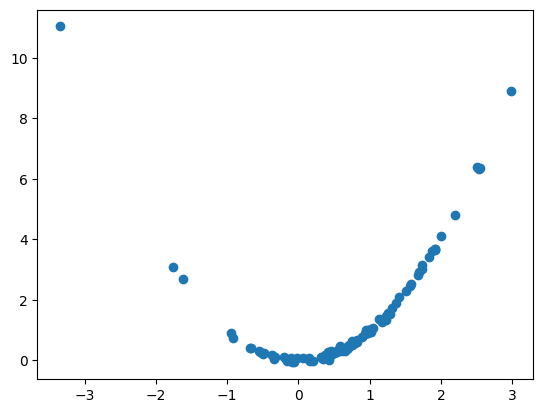

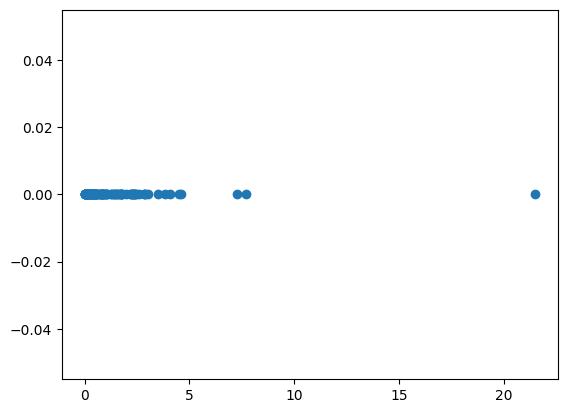

In [112]:

sol = [pvc.solve(rosenbrock, 10, 20, 2, -5.12, 5.12) for i in range(100)]

print(sol)
# solutions
plt.scatter([x[0][0] for x in sol], [x[0][1] for x in sol])
plt.show()

# solutions values
plt.scatter([x[1] for x in sol], np.zeros(len(sol)))